In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import cross_validate, train_test_split


In [2]:

def read_data_ml100k():
    names = ['user_id', 'item_id', 'rating', 'timestamp']
    data = pd.read_csv('u.data', sep='\t',
                       names=names, engine='python')
    num_users = data.user_id.unique().shape[0]
    num_items = data.item_id.unique().shape[0]
    return data, num_users, num_items

def read_item_details():
    names = ['movie_id',  'movie_title',  'release date',  'video release date', 
              'IMDb URL',  'unknown',  'Action',  'Adventure',  'Animation', 
              "Children's",  'Comedy',  'Crime',  'Documentary',  'Drama',  'Fantasy', 
              'Film-Noir',  'Horror',  'Musical',  'Mystery',  'Romance',  'Sci-Fi', 
              'Thriller',  'War',  'Western']
    data = pd.read_csv('u.item', sep='|', encoding="latin-1",
                       names=names, engine='python')

    return data[['movie_id',  'movie_title']]

In [3]:
item_data= read_item_details()

In [4]:
item_data.head(2)

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)


In [5]:
df, num_users, num_items = read_data_ml100k()
print(f'number of users: {num_users}, number of items: {num_items}')
df.head()

number of users: 943, number of items: 1682


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


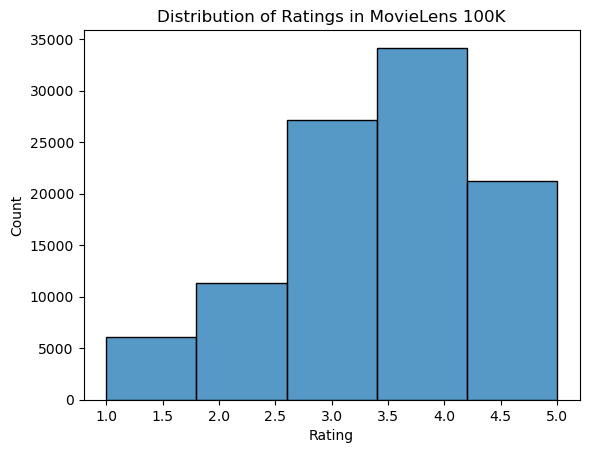

In [6]:
import seaborn as sns
sns.histplot(df['rating'], bins=5, ec='black')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings in MovieLens 100K')
plt.show()

In [7]:

reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[["user_id", "item_id","rating"]], reader)
data

In [8]:
train, test = train_test_split(data, test_size=0.25)
svd_model = SVD()
svd_model.fit(train)
prediction = svd_model.test(test)
accuracy.rmse(prediction)


RMSE: 0.9406


0.9406140601161375

In [9]:
results = cross_validate(svd_model, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9415  0.9262  0.9364  0.9387  0.9435  0.9372  0.0060  
Fit time          1.60    1.61    1.44    1.26    1.32    1.45    0.14    
Test time         0.43    0.22    0.15    0.31    0.15    0.25    0.11    


In [10]:
#test the model foe spesific user
user_id = 9
item = [item for item in test if item[0]==user_id]
preds = svd_model.test(testset=item)

print(f'recomended movies for user with id={user_id}')
accuracy.rmse(preds)

[item_data[item_data.movie_id==pred.iid]['movie_title'].values[0] for pred in preds]

recomended movies for user with id=9
RMSE: 1.2361


['Gandhi (1982)',
 'Deer Hunter, The (1978)',
 'Bridges of Madison County, The (1995)']